In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
import statsmodels.api as sms

%matplotlib inline

In [2]:
kcd = pd.read_csv('King_County_House_prices_dataset.csv')

In [3]:
# for showing all columns
pd.set_option("display.max_columns", None)

In [4]:
kcd.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [5]:
kcd.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [6]:
kcd.describe().round(2)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,19221.00,21534.00,21597.00,21597.00,21597.00,21597.00,17755.00,21597.00,21597.00,21597.00,21597.00,21597.00
mean,4.580474e+09,540296.57,3.37,2.12,2080.32,15099.41,1.49,0.01,0.23,3.41,7.66,1788.60,1971.00,83.64,98077.95,47.56,-122.21,1986.62,12758.28
std,2.876736e+09,367368.14,0.93,0.77,918.11,41412.64,0.54,0.09,0.77,0.65,1.17,827.76,29.38,399.95,53.51,0.14,0.14,685.23,27274.44
min,1.000102e+06,78000.00,1.00,0.50,370.00,520.00,1.00,0.00,0.00,1.00,3.00,370.00,1900.00,0.00,98001.00,47.16,-122.52,399.00,651.00
25%,2.123049e+09,322000.00,3.00,1.75,1430.00,5040.00,1.00,0.00,0.00,3.00,7.00,1190.00,1951.00,0.00,98033.00,47.47,-122.33,1490.00,5100.00
50%,3.904930e+09,450000.00,3.00,2.25,1910.00,7618.00,1.50,0.00,0.00,3.00,7.00,1560.00,1975.00,0.00,98065.00,47.57,-122.23,1840.00,7620.00
75%,7.308900e+09,645000.00,4.00,2.50,2550.00,10685.00,2.00,0.00,0.00,4.00,8.00,2210.00,1997.00,0.00,98118.00,47.68,-122.12,2360.00,10083.00
max,9.900000e+09,7700000.00,33.00,8.00,13540.00,1651359.00,3.50,1.00,4.00,5.00,13.00,9410.00,2015.00,2015.00,98199.00,47.78,-121.32,6210.00,871200.00


In [7]:
kcd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [8]:
kcd.shape

(21597, 21)

In [9]:
# Create a dataframe with Objekts in poor condition
kcd_poorcond = kcd[(kcd['condition'] <=3)]

In [10]:
# Dropping the date of the last Buy/Sell - for this Example-dataframe it is not signifikant, but it can be used also for this dataframe
kcd_poorcond.drop("date", inplace=True, axis=1)

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [11]:
# new column for summ Sqft Living and Lot
kcd.eval('qft_total = sqft_living + sqft_lot', inplace = True)
kcd.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'qft_total'],
      dtype='object')

In [12]:
# new column for average price for sum 
kcd.eval('aveprice = price /  qft_total', inplace = True)
kcd.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'qft_total', 'aveprice'],
      dtype='object')

In [13]:
# zipcode-sorted means to weparate later zipcodes with signifikant different aveprices
groupby_obj = kcd.groupby("zipcode")
groupby_obj.mean().round(2)
# groupby_obj.max()
# groupby_obj.count()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,qft_total,aveprice
zipcode,,,,,,,,,,,,,,,,,,,,
98001,4.651274e+09,281194.87,3.39,2.01,1903.78,14967.00,1.43,0.00,0.09,3.34,7.30,1723.76,1980.87,28.04,47.31,-122.27,1830.10,11218.88,16870.79,24.09
98002,4.850894e+09,234284.04,3.33,1.84,1627.74,7517.63,1.33,0.00,0.01,3.74,6.69,1522.54,1967.77,60.21,47.31,-122.21,1479.03,7585.48,9145.38,28.50
98003,4.674182e+09,294111.28,3.36,2.05,1928.88,10603.10,1.31,0.00,0.21,3.37,7.54,1663.55,1976.89,16.64,47.32,-122.31,1876.20,9746.18,12531.98,26.22
98004,4.394237e+09,1356523.99,3.85,2.53,2909.02,13104.22,1.43,0.00,0.31,3.50,8.69,2419.84,1971.47,213.76,47.62,-122.21,2674.70,12805.02,16013.24,90.88
98005,4.961872e+09,810289.70,3.85,2.42,2656.80,19928.79,1.28,0.00,0.10,3.70,8.49,2160.20,1969.74,57.99,47.61,-122.17,2567.86,18367.77,22585.59,48.42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98177,3.934998e+09,676419.39,3.40,2.10,2323.33,11904.40,1.28,0.00,0.81,3.49,7.98,1836.71,1960.84,155.89,47.74,-122.37,2186.20,11690.24,14227.74,53.81
98178,4.291467e+09,310612.76,3.31,1.73,1729.35,8309.12,1.19,0.04,0.53,3.32,6.82,1325.99,1955.23,85.32,47.50,-122.25,1648.82,8149.64,10038.47,33.24
98188,4.481851e+09,289078.35,3.43,1.86,1802.77,10126.08,1.23,0.00,0.15,3.33,7.04,1492.15,1965.51,53.18,47.45,-122.28,1636.28,9752.80,11928.85,25.45


In [14]:
kcd.drop('sqft_lot15', inplace=True, axis=1)

In [15]:
kcd.drop('lat', inplace=True, axis=1)

In [16]:
kcd.drop("long", inplace=True, axis=1)

In [17]:
kcd.drop("sqft_living15", inplace=True, axis=1)

In [18]:
kcd.drop("yr_renovated", inplace=True, axis=1)

In [19]:
kcd.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,qft_total,aveprice
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,0.0,1955,98178,6830,32.489019
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,98125,9812,54.830819
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,98028,10770,16.713092
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,98136,6960,86.781609
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,98074,9760,52.254098


In [20]:
# creates a new column for the free lot (sqft without building)
kcd.eval('lot_house_diff= sqft_lot - sqft_living', inplace = True)
kcd.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'zipcode', 'qft_total',
       'aveprice', 'lot_house_diff'],
      dtype='object')

In [21]:
# new dataframe with houses withh little free lot
kcd_sqft_price = kcd[kcd['lot_house_diff'] <= 1000]

In [22]:
# Too little data to work with
kcd_sqft_price.shape

(1750, 19)

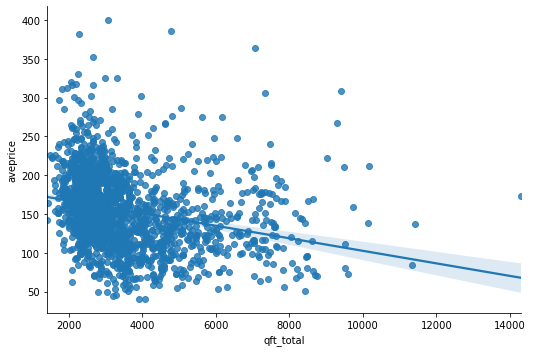

In [23]:
# Versuch einer Regression (misslungen)
sns.lmplot(('qft_total'), 'aveprice', data=kcd_sqft_price, aspect=1.5)

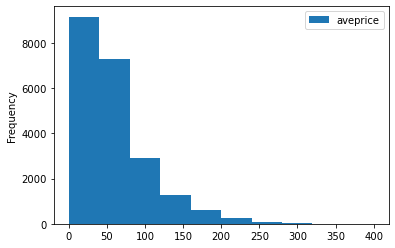

In [24]:
# for alle data
kcd.plot(kind="hist", x = "qft_total", y = "aveprice");

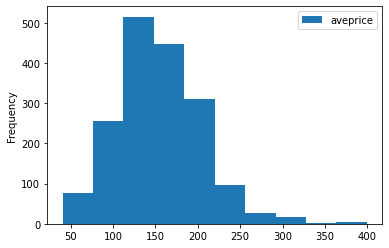

In [25]:
# for data with small free lot
kcd_sqft_price.plot(kind="hist", x = "qft_total", y = "aveprice");

In [26]:
# Multiple Linear regression for data with small free lot - First part
X = kcd_sqft_price[["sqft_living", "bedrooms", "floors", "condition", "grade", "bathrooms"]]
X = sms.add_constant(X)

In [27]:
# Multiple Linear regression for data with small free lot - Second part
y = kcd_sqft_price.price
y.head()

26    937000.0
27    667000.0
31    280000.0
35    696000.0
43    685000.0
Name: price, dtype: float64

In [28]:
# Modelling the OLS, which shows a 67%-fit
model = sms.OLS(y, X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.668
Model:                            OLS   Adj. R-squared:                  0.667
Method:                 Least Squares   F-statistic:                     584.8
Date:                Thu, 17 Sep 2020   Prob (F-statistic):               0.00
Time:                        08:48:23   Log-Likelihood:                -23386.
No. Observations:                1750   AIC:                         4.679e+04
Df Residuals:                    1743   BIC:                         4.683e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -1.064e+06   5.65e+04    -18.819      0.000   -1.17e+06   -9.53e+05
sqft_living   225.7679      8.844     25.529      0.000     208.423     243.113
bedrooms    -9410.0091   6011.131     -1.565      0.118   -2.12e+04    2379.778
floors       1.497e+04   7299.144      2.051      0.040     655.584    2.93e+04
condition    1.059e+05      1e+04     10.589      0.000    8.63e+04    1.26e+05
grade        1.151e+05   5679.464     20.266      0.000    1.04e+05    1.26e+05
bathrooms   -1.722e+04   7316.662     -2.353      0.019   -3.16e+04   -2864.864
==============================================================================
Omnibus:                      658.901   Durbin-Watson:                   1.918
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9196.500
Skew:                           1.369   Prob(JB):                         0.00
Kurtosis:                      13.892   Cond. No.                     2.86e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.86e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [75]:
# Test- und Trainigsset erstellen und MAPE errechnen
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
X = kcd_sqft_price[['sqft_living', "sqft_lot", "floors", "condition", "grade", "bedrooms"]]
y = kcd_sqft_price.price
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
regressor = LinearRegression()
regressor.fit(X_train, y_train) #training the algorithm
y_pred = regressor.predict(X_test)
(np.mean(np.abs(y_test-y_pred)/y_test))*100

22.715616097165807

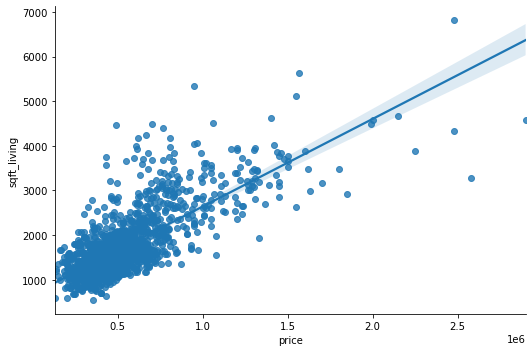

In [73]:
# Linear regression for price to House-sqft
sns.lmplot('price', 'sqft_living', data=kcd_sqft_price, aspect=1.5);

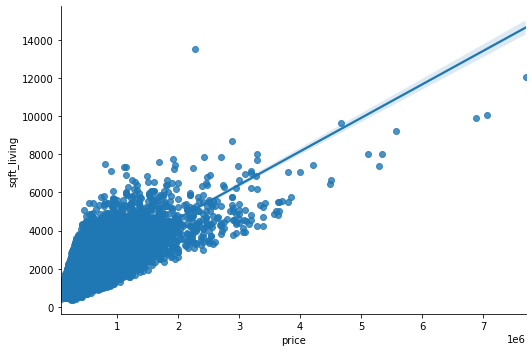

In [74]:
sns.lmplot('price', 'sqft_living', data=kcd, aspect=1.5);

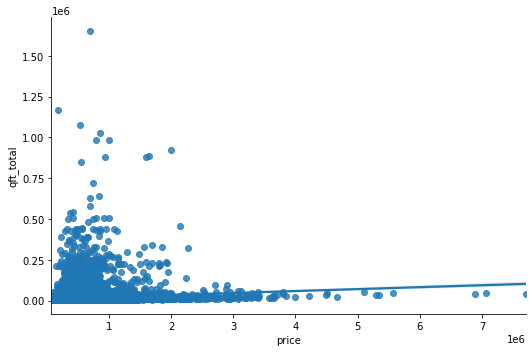

In [31]:
sns.lmplot('price', 'qft_total', data=kcd, aspect=1.5)

In [32]:
# Multiple Linear Regression like above, but with average price - not signifikant, because average price depends all all datas (only 40 % Fit)
X2 = kcd_sqft_price[["sqft_living", "sqft_lot", "bedrooms", "floors", "condition", "grade", "bathrooms"]]
X2 = sms.add_constant(X2)
y2 = kcd_sqft_price.aveprice

X2.head(n=2)

,const,sqft_living,sqft_lot,bedrooms,floors,condition,grade,bathrooms
26,1.0,2450,2691,3,2.0,3,8,1.75
27,1.0,1400,1581,3,1.5,5,8,1.00


In [33]:
sms.OLS(y2, X2).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               aveprice   R-squared:                       0.410
Model:                            OLS   Adj. R-squared:                  0.407
Method:                 Least Squares   F-statistic:                     172.6
Date:                Thu, 17 Sep 2020   Prob (F-statistic):          3.72e-194
Time:                        08:48:27   Log-Likelihood:                -8845.6
No. Observations:                1750   AIC:                         1.771e+04
Df Residuals:                    1742   BIC:                         1.775e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         -90.8951     14.142     -6.428      0.000    -118.631     -63.159
sqft_living     0.0257      0.003      7.510      0.000       0.019       0.032
sqft_lot       -0.0438      0.002    -19.439      0.000      -0.048      -0.039
bedrooms        0.0018      1.483      0.001      0.999      -2.906       2.910
floors          4.2857      1.895      2.262      0.024       0.569       8.002
condition      20.9851      2.469      8.498      0.000      16.142      25.828
grade          27.9051      1.415     19.715      0.000      25.129      30.681
bathrooms      -5.9535      1.815     -3.280      0.001      -9.514      -2.393
==============================================================================
Omnibus:                      106.079   Durbin-Watson:                   1.924
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              163.288
Skew:                           0.494   Prob(JB):                     3.49e-36
Kurtosis:                       4.124   Cond. No.                     4.30e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.3e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

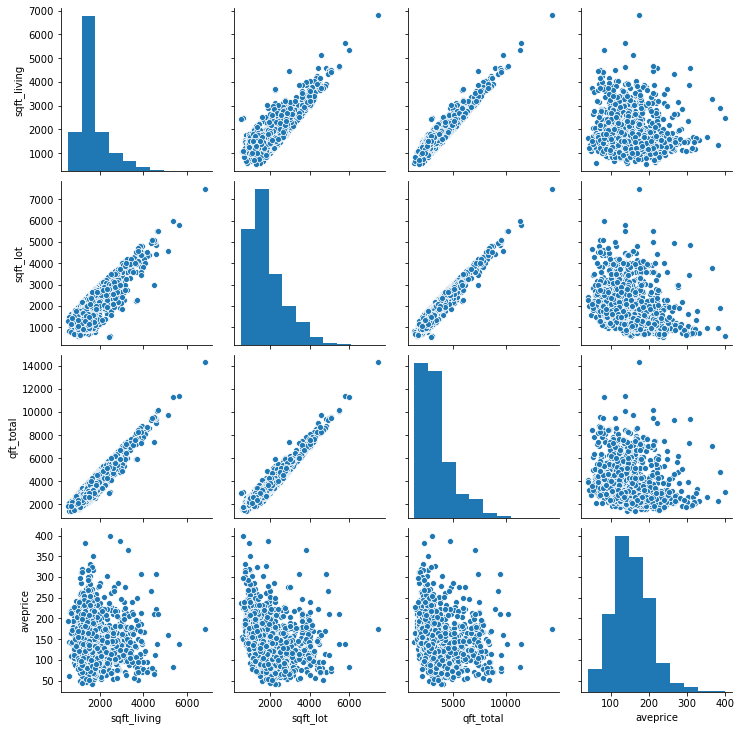

In [34]:
X3 = kcd_sqft_price[["sqft_living", "sqft_lot", "qft_total", "aveprice"]]
sns.pairplot(X3);

In [35]:
kcd['view'].unique()

array([ 0., nan,  3.,  4.,  2.,  1.])

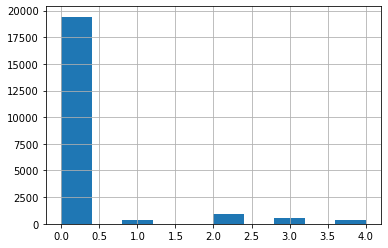

In [36]:
kcd["view"].hist()

In [37]:
kcd['waterfront'].unique()

array([nan,  0.,  1.])

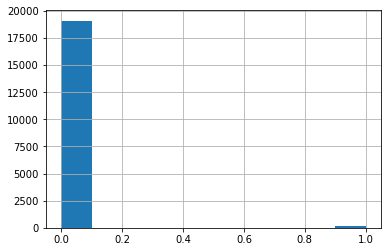

In [38]:
kcd["waterfront"].hist()

In [39]:
# Test- und Trainigsset erstellen und MAPE errechnen
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
X = kcd[['sqft_living', "sqft_lot", "floors", "condition", "grade", "bedrooms"]]
y = kcd.price
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
regressor = LinearRegression()
regressor.fit(X_train, y_train) #training the algorithm
y_pred = regressor.predict(X_test)
(np.mean(np.abs(y_test-y_pred)/y_test))*100

33.426679835936305

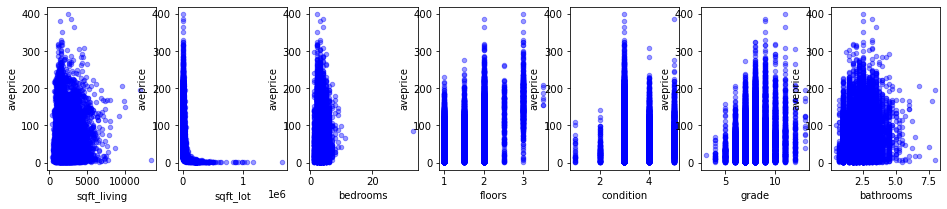

In [40]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, axes = plt.subplots(nrows=1, ncols=7, figsize=(16,3))

for xcol, ax in zip(['sqft_living', "sqft_lot", "bedrooms", "floors", "condition", "grade", "bathrooms"], axes):
    kcd.plot(kind='scatter', x=xcol, y='aveprice', ax=ax, alpha=0.4, color='b')

In [41]:
# Dropping the view - for this Example-dataframe it is not signifikant
kcd_poorcond.drop("view", inplace=True, axis=1)

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [42]:
# Dropping even more of what is not signifikant for this Example
kcd_poorcond.drop("sqft_living15", inplace=True, axis=1)

In [43]:
# Dropping even more of what is not signifikant for this Example
kcd_poorcond.drop("sqft_lot15", inplace=True, axis=1)

In [44]:
# Dropping even more of what is not signifikant for this Example
kcd_poorcond.drop("lat", inplace=True, axis=1)

In [45]:
# Dropping even more of what is not signifikant for this Example
kcd_poorcond.drop("long", inplace=True, axis=1)

In [46]:
kcd_poorcond.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode
0,7129300520,221900.0,3,1.00,1180,5650,1.0,NaN,3,7,1180,0.0,1955,0.0,98178
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0.0,3,7,2170,400.0,1951,1991.0,98125
2,5631500400,180000.0,2,1.00,770,10000,1.0,0.0,3,6,770,0.0,1933,NaN,98028
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0.0,3,8,1680,0.0,1987,0.0,98074
5,7237550310,1230000.0,4,4.50,5420,101930,1.0,0.0,3,11,3890,1530.0,2001,0.0,98053


In [47]:
# resetting the Index
kcd_poorcond = kcd_poorcond.reset_index(level=None, drop=False, inplace=False, col_fill='')

In [48]:
kcd_poorcond

,index,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode
0,0,7129300520,221900.0,3,1.00,1180,5650,1.0,NaN,3,7,1180,0.0,1955,0.0,98178
1,1,6414100192,538000.0,3,2.25,2570,7242,2.0,0.0,3,7,2170,400.0,1951,1991.0,98125
2,2,5631500400,180000.0,2,1.00,770,10000,1.0,0.0,3,6,770,0.0,1933,NaN,98028
3,4,1954400510,510000.0,3,2.00,1680,8080,1.0,0.0,3,8,1680,0.0,1987,0.0,98074
4,5,7237550310,1230000.0,4,4.50,5420,101930,1.0,0.0,3,11,3890,1530.0,2001,0.0,98053
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14214,21592,263000018,360000.0,3,2.50,1530,1131,3.0,0.0,3,8,1530,0.0,2009,0.0,98103
14215,21593,6600060120,400000.0,4,2.50,2310,5813,2.0,0.0,3,8,2310,0.0,2014,0.0,98146
14216,21594,1523300141,402101.0,2,0.75,1020,1350,2.0,0.0,3,7,1020,0.0,2009,0.0,98144
14217,21595,291310100,400000.0,3,2.50,1600,2388,2.0,NaN,3,8,1600,0.0,2004,0.0,98027


In [49]:
# Dropping old index
kcd_poorcond.drop("index", inplace=True, axis=1)

In [50]:
kcd_poorcond

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode
0,7129300520,221900.0,3,1.00,1180,5650,1.0,NaN,3,7,1180,0.0,1955,0.0,98178
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0.0,3,7,2170,400.0,1951,1991.0,98125
2,5631500400,180000.0,2,1.00,770,10000,1.0,0.0,3,6,770,0.0,1933,NaN,98028
3,1954400510,510000.0,3,2.00,1680,8080,1.0,0.0,3,8,1680,0.0,1987,0.0,98074
4,7237550310,1230000.0,4,4.50,5420,101930,1.0,0.0,3,11,3890,1530.0,2001,0.0,98053
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14214,263000018,360000.0,3,2.50,1530,1131,3.0,0.0,3,8,1530,0.0,2009,0.0,98103
14215,6600060120,400000.0,4,2.50,2310,5813,2.0,0.0,3,8,2310,0.0,2014,0.0,98146
14216,1523300141,402101.0,2,0.75,1020,1350,2.0,0.0,3,7,1020,0.0,2009,0.0,98144
14217,291310100,400000.0,3,2.50,1600,2388,2.0,NaN,3,8,1600,0.0,2004,0.0,98027


In [51]:
kcd_poorcond

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode
0,7129300520,221900.0,3,1.00,1180,5650,1.0,NaN,3,7,1180,0.0,1955,0.0,98178
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0.0,3,7,2170,400.0,1951,1991.0,98125
2,5631500400,180000.0,2,1.00,770,10000,1.0,0.0,3,6,770,0.0,1933,NaN,98028
3,1954400510,510000.0,3,2.00,1680,8080,1.0,0.0,3,8,1680,0.0,1987,0.0,98074
4,7237550310,1230000.0,4,4.50,5420,101930,1.0,0.0,3,11,3890,1530.0,2001,0.0,98053
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14214,263000018,360000.0,3,2.50,1530,1131,3.0,0.0,3,8,1530,0.0,2009,0.0,98103
14215,6600060120,400000.0,4,2.50,2310,5813,2.0,0.0,3,8,2310,0.0,2014,0.0,98146
14216,1523300141,402101.0,2,0.75,1020,1350,2.0,0.0,3,7,1020,0.0,2009,0.0,98144
14217,291310100,400000.0,3,2.50,1600,2388,2.0,NaN,3,8,1600,0.0,2004,0.0,98027


In [52]:
kcd_poorcond.sort_values('condition', ascending=True)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode
9363,9187200095,432500.0,6,2.00,3080,5500,2.0,0.0,1,7,3080,?,1900,0.0,98122
247,5175800060,365000.0,4,2.00,1940,25600,1.0,NaN,1,8,1940,0.0,1962,0.0,98006
11456,9272202260,130000.0,3,1.00,1200,7000,2.0,0.0,1,7,1200,0.0,1908,NaN,98116
23,9435300030,550000.0,4,1.00,1660,34848,1.0,0.0,1,5,930,730.0,1933,0.0,98052
4630,9275200080,295000.0,3,1.50,720,7450,1.0,0.0,1,5,720,0.0,1924,0.0,98126
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4778,5163700085,260000.0,3,1.00,1790,11884,1.0,0.0,3,7,1790,0.0,1951,NaN,98031
4779,1794500360,865000.0,2,1.00,1470,5400,1.5,NaN,3,8,1470,0.0,1912,NaN,98119
4780,4083800555,550000.0,2,1.00,980,3080,1.5,0.0,3,7,980,?,1910,1946.0,98103
4769,9324800450,560000.0,3,1.50,2790,6900,1.0,NaN,3,8,1700,1090.0,1955,NaN,98125


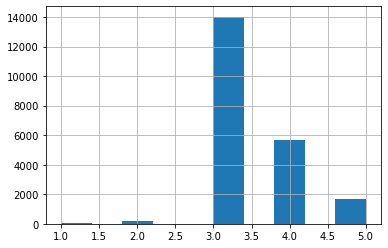

In [53]:
kcd["condition"].hist();

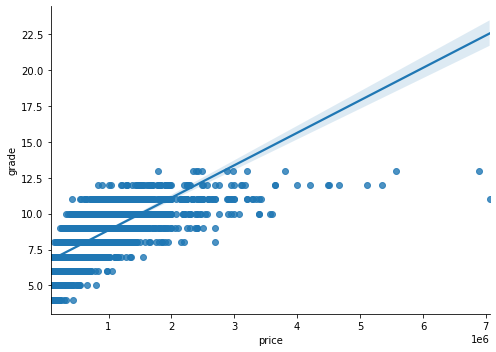

In [54]:
sns.lmplot(('price'), 'grade', data=kcd_poorcond, aspect=1.4);

In [55]:
# new column for summ Sqft Living and Lot
kcd_poorcond.eval('qft_total = sqft_living + sqft_lot', inplace = True)
kcd_poorcond.columns

Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'qft_total'],
      dtype='object')

In [56]:
# new column for average price for sum 
kcd_poorcond.eval('aveprice = price /  qft_total', inplace = True)
kcd_poorcond.columns

Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'qft_total',
       'aveprice'],
      dtype='object')

In [57]:
kcd_poorcond.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,qft_total,aveprice
0,7129300520,221900.0,3,1.00,1180,5650,1.0,NaN,3,7,1180,0.0,1955,0.0,98178,6830,32.489019
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0.0,3,7,2170,400.0,1951,1991.0,98125,9812,54.830819
2,5631500400,180000.0,2,1.00,770,10000,1.0,0.0,3,6,770,0.0,1933,NaN,98028,10770,16.713092
3,1954400510,510000.0,3,2.00,1680,8080,1.0,0.0,3,8,1680,0.0,1987,0.0,98074,9760,52.254098
4,7237550310,1230000.0,4,4.50,5420,101930,1.0,0.0,3,11,3890,1530.0,2001,0.0,98053,107350,11.457848


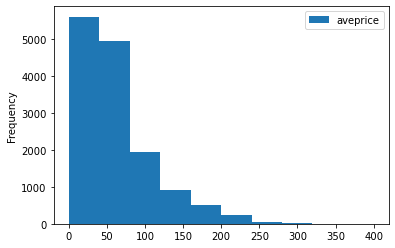

In [58]:
# 
kcd_poorcond.plot(kind="hist", x = "qft_total", y = "aveprice");

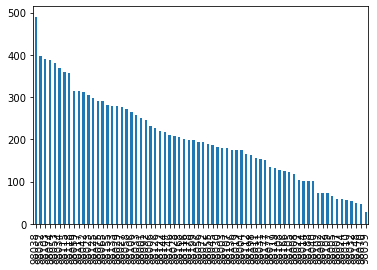

In [59]:
kcd_poorcond.zipcode.value_counts().plot(kind='bar');

In [60]:
kcd_poorcond.zipcode.value_counts()

98038    490
98052    398
98103    390
98074    388
98053    381
        ... 
98010     57
98032     54
98148     49
98070     48
98039     28
Name: zipcode, Length: 70, dtype: int64

In [61]:
kcd_poorcond

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,qft_total,aveprice
0,7129300520,221900.0,3,1.00,1180,5650,1.0,NaN,3,7,1180,0.0,1955,0.0,98178,6830,32.489019
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0.0,3,7,2170,400.0,1951,1991.0,98125,9812,54.830819
2,5631500400,180000.0,2,1.00,770,10000,1.0,0.0,3,6,770,0.0,1933,NaN,98028,10770,16.713092
3,1954400510,510000.0,3,2.00,1680,8080,1.0,0.0,3,8,1680,0.0,1987,0.0,98074,9760,52.254098
4,7237550310,1230000.0,4,4.50,5420,101930,1.0,0.0,3,11,3890,1530.0,2001,0.0,98053,107350,11.457848
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14214,263000018,360000.0,3,2.50,1530,1131,3.0,0.0,3,8,1530,0.0,2009,0.0,98103,2661,135.287486
14215,6600060120,400000.0,4,2.50,2310,5813,2.0,0.0,3,8,2310,0.0,2014,0.0,98146,8123,49.242891
14216,1523300141,402101.0,2,0.75,1020,1350,2.0,0.0,3,7,1020,0.0,2009,0.0,98144,2370,169.662869
14217,291310100,400000.0,3,2.50,1600,2388,2.0,NaN,3,8,1600,0.0,2004,0.0,98027,3988,100.300903


In [62]:
kcd_test = kcd_poorcond.query('zipcode == 98103 and sqft_living >= 1500 and grade >=7 and yr_built <= 2000')

In [140]:
kcd_test.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,qft_total,aveprice
count,1.000000e+02,1.000000e+02,100.000000,100.000000,100.000000,100.000000,100.000000,92.0,100.0,100.000000,100.000000,100.000000,78.000000,100.0,100.000000,100.000000
mean,5.002502e+09,6.703613e+05,3.680000,2.085000,2051.910000,4134.110000,1.590000,0.0,3.0,7.370000,1658.280000,1937.540000,461.474359,98103.0,6186.020000,114.371176
std,3.301856e+09,1.476123e+05,1.136004,0.880642,506.074377,1352.066551,0.538329,0.0,0.0,0.562372,414.463852,30.135861,847.999521,0.0,1587.500774,34.435741
min,9.100014e+07,3.924500e+05,1.000000,1.000000,1500.000000,1159.000000,1.000000,0.0,3.0,7.000000,790.000000,1900.000000,0.000000,98103.0,3011.000000,47.660312
25%,2.229100e+09,5.645000e+05,3.000000,1.500000,1680.000000,3032.000000,1.000000,0.0,3.0,7.000000,1422.500000,1913.500000,0.000000,98103.0,4935.000000,95.391519
50%,4.083303e+09,6.725000e+05,3.000000,2.000000,1905.000000,4132.500000,1.500000,0.0,3.0,7.000000,1640.000000,1925.000000,0.000000,98103.0,6085.000000,111.030892
75%,9.136101e+09,7.800000e+05,4.000000,2.500000,2202.500000,5000.000000,2.000000,0.0,3.0,8.000000,1902.500000,1960.250000,0.000000,98103.0,7087.500000,132.870427
max,9.551202e+09,1.030000e+06,9.000000,4.500000,3830.000000,8100.000000,3.000000,0.0,3.0,9.000000,3440.000000,2000.000000,2014.000000,98103.0,11540.000000,226.486316


In [64]:
kcd['condition'].unique()

array([3, 5, 4, 1, 2])

In [65]:
groupby_obj = kcd_poorcond.groupby("zipcode")
groupby_obj.mean().round(2)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,yr_built,yr_renovated,qft_total,aveprice
zipcode,,,,,,,,,,,,,,,
98001,4.839190e+09,293987.68,3.48,2.18,1989.53,13068.31,1.56,0.00,2.98,7.48,1849.17,1990.02,30.33,15057.84,27.23
98002,4.618837e+09,258886.82,3.54,2.30,1809.12,6241.93,1.60,0.00,3.00,6.95,1719.12,1993.57,90.71,8051.05,36.61
98003,4.863854e+09,298925.78,3.40,2.19,2016.93,10016.92,1.43,0.00,2.99,7.65,1784.69,1981.88,25.12,12033.85,27.98
98004,4.497522e+09,1520773.59,3.97,2.82,3257.21,12572.23,1.60,0.01,2.98,9.12,2760.66,1980.71,288.01,15829.44,103.68
98005,4.586725e+09,858172.81,3.78,2.56,2835.72,21640.78,1.44,0.00,2.97,8.75,2415.87,1976.24,73.11,24476.49,49.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98177,3.951609e+09,649681.24,3.40,2.15,2311.85,11496.60,1.34,0.00,3.00,8.06,1876.44,1966.29,211.17,13808.45,54.14
98178,4.191866e+09,308059.63,3.29,1.72,1739.40,8163.63,1.19,0.04,2.99,6.84,1353.17,1957.76,111.82,9903.03,32.82
98188,4.541263e+09,290005.93,3.42,1.89,1844.97,10019.28,1.26,0.00,3.00,7.11,1560.32,1968.66,69.26,11864.25,25.85


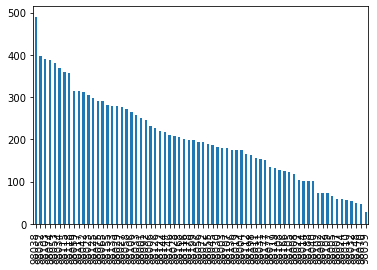

In [66]:
kcd_poorcond.zipcode.value_counts().plot.bar();

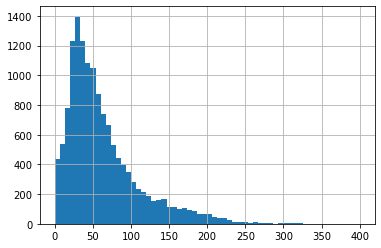

In [67]:
kcd_poorcond["aveprice"].hist(bins = 60)

In [68]:
kcd_poorcond.aveprice.mean()

63.07233163349306

In [69]:
kcd_poorcond.aveprice.median()

49.46576968737634

In [70]:
kcd_2poorcond = kcd_poorcond[(kcd_poorcond['aveprice'] <=150)]

In [71]:
kcd_2poorcond.aveprice.mean()

53.3813250426494

In [139]:
kcd_2poorcond

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,qft_total,aveprice
0,7129300520,221900.0,3,1.00,1180,5650,1.0,NaN,3,7,1180,0.0,1955,0.0,98178,6830,32.489019
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0.0,3,7,2170,400.0,1951,1991.0,98125,9812,54.830819
2,5631500400,180000.0,2,1.00,770,10000,1.0,0.0,3,6,770,0.0,1933,NaN,98028,10770,16.713092
3,1954400510,510000.0,3,2.00,1680,8080,1.0,0.0,3,8,1680,0.0,1987,0.0,98074,9760,52.254098
4,7237550310,1230000.0,4,4.50,5420,101930,1.0,0.0,3,11,3890,1530.0,2001,0.0,98053,107350,11.457848
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14211,3448900210,610685.0,4,2.50,2520,6023,2.0,0.0,3,9,2520,0.0,2014,0.0,98056,8543,71.483671
14212,7936000429,1010000.0,4,3.50,3510,7200,2.0,0.0,3,9,2600,910.0,2009,0.0,98136,10710,94.304388
14214,263000018,360000.0,3,2.50,1530,1131,3.0,0.0,3,8,1530,0.0,2009,0.0,98103,2661,135.287486
14215,6600060120,400000.0,4,2.50,2310,5813,2.0,0.0,3,8,2310,0.0,2014,0.0,98146,8123,49.242891


In [94]:
kcd_search = kcd.sort_values('id', ascending=True)

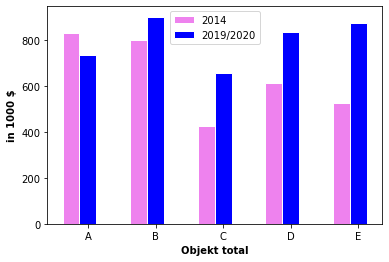

In [2]:
import numpy as np
import matplotlib.pyplot as plt
 
# set width of bar
barWidth = 0.25
 
# set height of bar
bars1 = [830, 800, 425, 611, 525]
bars2 = [733, 900, 655, 833, 871]
 
# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
 
# Make the plot
plt.bar(r1, bars1, color='violet', width=barWidth, edgecolor='white', label='2014')
plt.bar(r2, bars2, color='blue', width=barWidth, edgecolor='white', label='2019/2020')
 
# Add xticks on the middle of the group bars
plt.xlabel('Objekt total', fontweight='bold')
plt.ylabel('in 1000 $', fontweight = 'bold')
plt.xticks([r + barWidth for r in range(len(bars1))], ['A', 'B', 'C', 'D', 'E'])
 
# Create legend & Show graphic
plt.legend()
plt.show()
